# Willkommen

Kommentare immer unter dem Code 

In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib.pylab
!pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 288.2/288.2 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     ------------------------------------- 163.6/163.6 kB 10.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ------------------------------------- 965.4/965.4 kB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.2 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)})

# 1) Daten einlesen


In [14]:
df_cal = pd.read_csv('../Data/calendar.csv', sep=',')
df_cal.head()

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1
1,2011-03-02,11105,NaN,NaN,NaN,NaN,1
2,2011-03-03,11105,NaN,NaN,NaN,NaN,1
3,2011-03-04,11105,NaN,NaN,NaN,NaN,1
4,2011-03-05,11106,NaN,NaN,NaN,NaN,1


In [15]:
df_price = pd.read_csv('../Data/prices.csv', sep=',')
df_price.head()

,Unnamed: 0,item_id,week_id,price
0,0,HOBBIES_1_001,11325,9.58
1,1,HOBBIES_1_001,11326,9.58
2,2,HOBBIES_1_001,11327,8.26
3,3,HOBBIES_1_001,11328,8.26
4,4,HOBBIES_1_001,11329,8.26


In [16]:
df_sales = pd.read_csv('../Data/sales.csv', sep=',')
df_sales

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570518,2016-02-29,FOODS_3_823,FOODS_3,FOODS,2
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0
5570520,2016-02-29,FOODS_3_825,FOODS_3,FOODS,0
5570521,2016-02-29,FOODS_3_826,FOODS_3,FOODS,1


#2) Datenexploration

###Calendar

In [17]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1858 non-null   object
 1   week_id       1858 non-null   int64 
 2   event_name_1  151 non-null    object
 3   event_type_1  151 non-null    object
 4   event_name_2  4 non-null      object
 5   event_type_2  4 non-null      object
 6   snap          1858 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 101.7+ KB


In [18]:
df_cal.describe()

,week_id,snap
count,1858.000000,1858.000000
mean,11339.624327,0.328310
std,146.305645,0.469725
min,11105.000000,0.000000
25%,11219.000000,0.000000
50%,11334.000000,0.000000
75%,11447.000000,1.000000
max,11609.000000,1.000000


In [19]:
df_cal['date']

0       2011-03-01
1       2011-03-02
2       2011-03-03
3       2011-03-04
4       2011-03-05
           ...    
1853    2016-03-27
1854    2016-03-28
1855    2016-03-29
1856    2016-03-30
1857    2016-03-31
Name: date, Length: 1858, dtype: object

In [20]:
df_cal['event_name_1'].unique()

array([nan, 'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End',
       'OrthodoxEaster', 'Pesach End', 'Cinco De Mayo', "Mother's day",
       'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'SuperBowl',
       'ValentinesDay', 'PresidentsDay', 'Easter'], dtype=object)

In [21]:
df_cal['event_name_1'].value_counts()

LentStart              6
StPatricksDay          6
Purim End              6
LentWeek2              6
Halloween              5
PresidentsDay          5
ValentinesDay          5
SuperBowl              5
MartinLutherKingDay    5
OrthodoxChristmas      5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
EidAlAdha              5
LaborDay               5
ColumbusDay            5
Eid al-Fitr            5
Ramadan starts         5
IndependenceDay        5
NBAFinalsEnd           5
NBAFinalsStart         5
MemorialDay            5
Mother's day           5
Pesach End             5
Easter                 5
Father's day           4
Cinco De Mayo          4
OrthodoxEaster         4
Name: event_name_1, dtype: int64

In [22]:
df_cal['event_name_1'].value_counts().sum()

151

Von 1858 Datensätzen finden 151 an einem Feiertag statt.

In [23]:
df_cal['event_name_2'].value_counts()

Easter            1
Cinco De Mayo     1
OrthodoxEaster    1
Father's day      1
Name: event_name_2, dtype: int64

Doppelter Feiertag findet nur 4 mal im Datensatz statt.


In [24]:
df_cal['event_name_2'].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [25]:
df_cal['event_type_1'].unique()

array([nan, 'Religious', 'Cultural', 'National', 'Sporting'], dtype=object)

In [26]:
df_cal['event_type_2'].unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

In [27]:
df_cal[df_cal['event_name_1'] == 'Easter']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
404,2012-04-08,11211,Easter,Cultural,NaN,NaN,1
761,2013-03-31,11310,Easter,Cultural,NaN,NaN,0
1146,2014-04-20,11412,Easter,Cultural,OrthodoxEaster,Religious,0
1496,2015-04-05,11510,Easter,Cultural,NaN,NaN,1
1853,2016-03-27,11609,Easter,Cultural,NaN,NaN,0


In [28]:
df_cal[df_cal['event_name_2'] == 'Easter']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
54,2011-04-24,11113,OrthodoxEaster,Religious,Easter,Cultural,0


2 Events wahrscheinlich falls 2 Feiertage am selben Tag stattfinden.


In [29]:
df_cal['snap'].value_counts()

0    1248
1     610
Name: snap, dtype: int64

In [30]:
snap_test = df_cal[(df_cal['week_id']>=11105)&(df_cal['week_id']<=11130)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


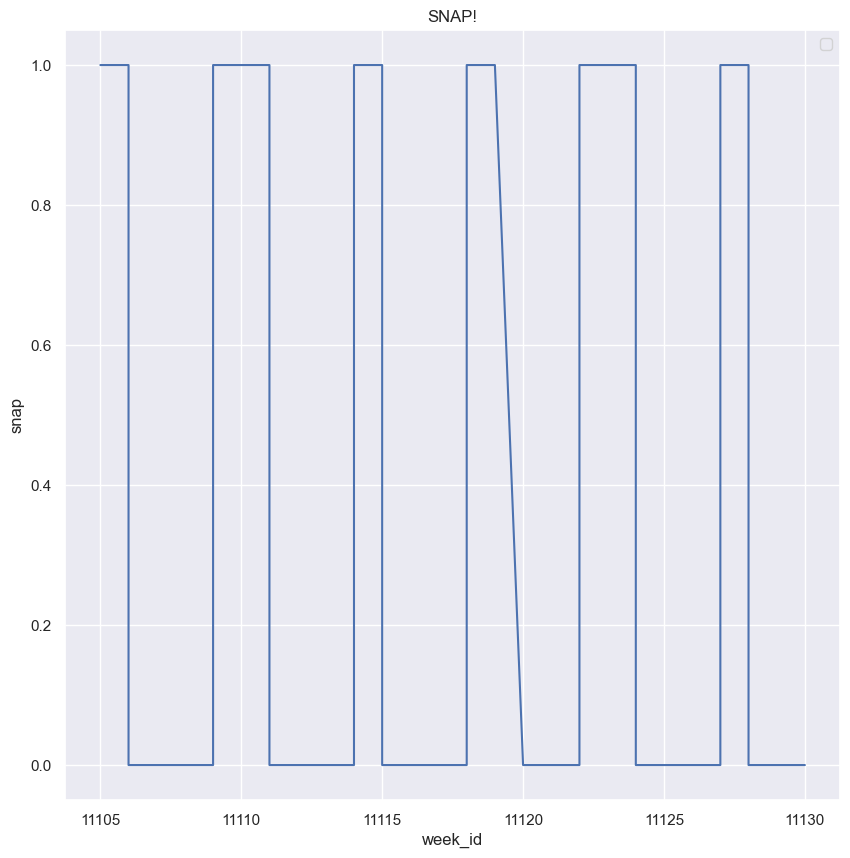

In [31]:
plt.plot(snap_test['week_id'],snap_test['snap'])
plt.title('SNAP!')
plt.xlabel("week_id")
plt.ylabel("snap")
plt.legend(loc='upper right')
plt.show()

Dauer des Snap Angebots ist immer unterschiedlich lang.

Differenzen zwischen Snap tagen anschauen.


###Prices

In [32]:
df_price = df_price.drop(columns=['Unnamed: 0'])
df_price

,item_id,week_id,price
0,HOBBIES_1_001,11325,9.58
1,HOBBIES_1_001,11326,9.58
2,HOBBIES_1_001,11327,8.26
3,HOBBIES_1_001,11328,8.26
4,HOBBIES_1_001,11329,8.26
...,...,...,...
656545,FOODS_3_827,11605,1.00
656546,FOODS_3_827,11606,1.00
656547,FOODS_3_827,11607,1.00
656548,FOODS_3_827,11608,1.00


In [33]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656550 entries, 0 to 656549
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   item_id  656550 non-null  object 
 1   week_id  656550 non-null  int64  
 2   price    656550 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ MB


Price = durchschnittlicher Verkaufspreis der jeweiligen Woche

Keine Nan's

In [34]:
df_price['item_id'].value_counts()

HOUSEHOLD_2_429    266
HOUSEHOLD_2_368    266
HOUSEHOLD_2_384    266
HOUSEHOLD_2_383    266
FOODS_3_495        266
                  ... 
FOODS_2_248         23
FOODS_2_117         14
FOODS_2_209         14
FOODS_3_296         11
FOODS_3_595          7
Name: item_id, Length: 3049, dtype: int64

In [35]:
df_price['price'].describe()

count    656550.000000
mean          4.412243
std           3.395917
min           0.010000
25%           2.220000
50%           3.470000
75%           5.770000
max          30.980000
Name: price, dtype: float64

In [36]:
df_price[['item_id','price']][df_price['price']>30].groupby(by='item_id').count()

,price
item_id,
HOBBIES_1_060,110
HOBBIES_1_225,109
HOBBIES_1_361,109


Items mit einem Verkaufspreis in der jeweiligen Woche mit einem Preis >30

In [37]:
df_price['week_id'].value_counts()

11608    3049
11609    3049
11607    3049
11606    3049
11605    3049
         ... 
11109    1509
11108    1490
11107    1471
11106    1445
11105    1413
Name: week_id, Length: 266, dtype: int64

In unterschiedlichen Wochen 

###Sales

Sales = Abverkauf in Stück pro Produkt pro Tag (auch wenn das Produkt nicht verkauft wurde)



In [38]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570523 entries, 0 to 5570522
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   date     object
 1   item_id  object
 2   dept_id  object
 3   cat_id   object
 4   sales    int64 
dtypes: int64(1), object(4)
memory usage: 212.5+ MB


In [39]:
df_sales[df_sales['sales'].isna()]

,date,item_id,dept_id,cat_id,sales


In [40]:
df_sales['sales'].describe()

count    5.570523e+06
mean     1.319099e+00
std      4.069521e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.480000e+02
Name: sales, dtype: float64

In [41]:
df_sales[df_sales['sales']==0]

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570512,2016-02-29,FOODS_3_817,FOODS_3,FOODS,0
5570515,2016-02-29,FOODS_3_820,FOODS_3,FOODS,0
5570516,2016-02-29,FOODS_3_821,FOODS_3,FOODS,0
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0


In [42]:
df_sales[df_sales['date']=='2011-03-01']

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
3044,2011-03-01,FOODS_3_823,FOODS_3,FOODS,0
3045,2011-03-01,FOODS_3_824,FOODS_3,FOODS,0
3046,2011-03-01,FOODS_3_825,FOODS_3,FOODS,0
3047,2011-03-01,FOODS_3_826,FOODS_3,FOODS,0


Alle 3049 Produkte haben für jedes Date eine Verkaufsanzahl.

C:\Users\edwin\AppData\Local\Temp\ipykernel_19124\474284637.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales.groupby(by='cat_id').sum().plot.bar()


<AxesSubplot: xlabel='cat_id'>

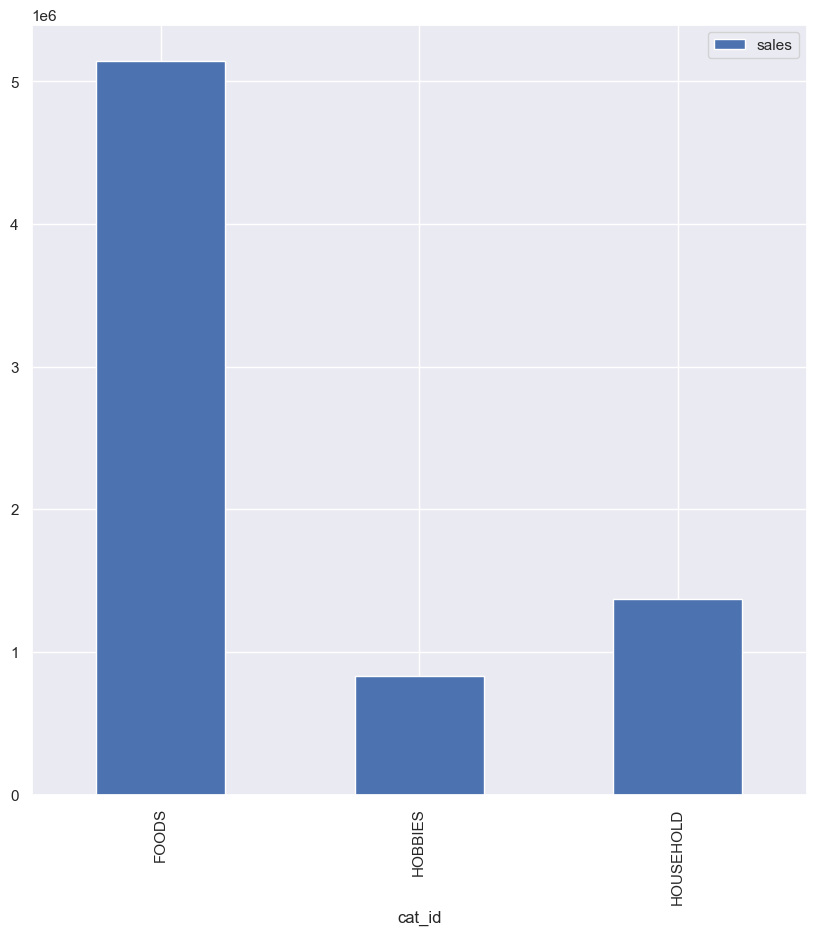

In [43]:
df_sales.groupby(by='cat_id').sum().plot.bar()

### Mergen der Datensätze

Calendar und Sales über das Datum
Price hinzufügen über die week_id


In [44]:
df_calsales = pd.merge(df_cal,df_sales,how='left',on='date')
df_calsales

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570549,2016-03-27,11609,Easter,Cultural,NaN,NaN,0,NaN,NaN,NaN,NaN
5570550,2016-03-28,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5570551,2016-03-29,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5570552,2016-03-30,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [45]:
df = pd.merge(df_calsales,df_price,how='left',on=['week_id','item_id'])

In [46]:
df

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5570549,2016-03-27,11609,Easter,Cultural,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5570550,2016-03-28,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5570551,2016-03-29,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5570552,2016-03-30,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


Testen auf Robustheit des Merger

In [47]:
df[(df['item_id']=='HOBBIES_1_010')&(df['week_id']==11117)]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
246978,2011-05-21,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,2.97
250027,2011-05-22,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,2.97
253076,2011-05-23,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,3.0,2.97
256125,2011-05-24,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,1.0,2.97
259174,2011-05-25,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,1.0,2.97
262223,2011-05-26,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,1.0,2.97
265272,2011-05-27,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,2.97


In [48]:
df_price[df_price['week_id']==11105]

,item_id,week_id,price
1428,HOBBIES_1_008,11105,0.42
1694,HOBBIES_1_009,11105,1.56
1960,HOBBIES_1_010,11105,3.17
2432,HOBBIES_1_012,11105,5.98
3134,HOBBIES_1_015,11105,0.72
...,...,...,...
654659,FOODS_3_819,11105,1.98
654925,FOODS_3_820,11105,1.57
655348,FOODS_3_822,11105,4.28
655805,FOODS_3_824,11105,2.48


In [49]:
df_price[(df_price['week_id']==11105) & (df_price['item_id']=='HOBBIES_1_010')]

,item_id,week_id,price
1960,HOBBIES_1_010,11105,3.17


Vergleich Preiswerte aus df_price mit gemergetem Dataframe


In [50]:
df_sales[(df_sales['date']>='2011-03-01')&(df_sales['date']<='2011-03-21')&(df_sales['item_id']=='HOBBIES_1_001')]

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
3049,2011-03-02,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
6098,2011-03-03,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
9147,2011-03-04,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
12196,2011-03-05,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
15245,2011-03-06,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
18294,2011-03-07,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
21343,2011-03-08,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
24392,2011-03-09,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
27441,2011-03-10,HOBBIES_1_001,HOBBIES_1,HOBBIES,0


Vergleich Saleswerte aus df_sales mit gemergetem Dataframe

### Simple Feature Creation

In [51]:
df[(df['date']=='2011-05-23')&(df['item_id']=='HOBBIES_1_010')]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
253076,2011-05-23,11117,NaN,NaN,NaN,NaN,0,HOBBIES_1_010,HOBBIES_1,HOBBIES,3.0,2.97


NaN


In [52]:
df[df['sales'].isnull()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
5570523,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570524,2016-03-02,11605,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570525,2016-03-03,11605,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570526,2016-03-04,11605,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570527,2016-03-05,11606,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570528,2016-03-06,11606,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570529,2016-03-07,11606,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570530,2016-03-08,11606,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570531,2016-03-09,11606,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
5570532,2016-03-10,11606,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


NaN in Sales nur ab dem 01.03.2016 da ab dort keine Sales Daten mehr verfügbar sind, der Kalendar jedoch bis zum 31.03.2016 geht.

In [53]:
df[(df['price'].isnull()==True)&(df['sales']>0)]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price


Da Preis nur NaN ist wenn Sales auch 0 ist können wir den Preis an diesen Stellen auch auf 0 setzen.

In [54]:
df['turnover_day'] = df['sales']*df['price']

In [55]:
df

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,turnover_day
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570549,2016-03-27,11609,Easter,Cultural,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5570550,2016-03-28,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5570551,2016-03-29,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5570552,2016-03-30,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


#Im nächsten Schritt date zu datetime format ändern und price von nan zu 0 ändern (aber nicht für die Daten ab dem 01.03.2016)